In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import os

pd.options.mode.chained_assignment = None

In [2]:
DIR = os.getcwd()

# raw data
RAW = "\data\\raw"
PATH_DF_TIMESERIES = DIR + RAW + '\\df_timeseries_en.tsv.gz' # 571 mb

# clean data
CLEAN = "\data\\clean"
PATH_TECH_CHANNELS = DIR + CLEAN + '\\tech_review_channels.tsv.gz'
PATH_TECH_VIDEOS = DIR + CLEAN + '\\tech_review_videos.tsv.gz'

In [17]:
keywords = {
    'laptop':['laptop','macbook','zenbook','vivobook','chromebook','aspire','inspiron','legion','macos','ram','cpu','monitor','keyboard','mouse','linux','windows'],
    'phone':['mobile','phone','smartphone','cellphone','verizon','iphone','android','galaxy','pixel','oneplus','ios','case','nexus','redmi','reno','nokia','htc','realme'],
    'camera':['camera','dslr','mirrorless','canon','nikon','sony','fujifilm','gopro','aperture','shutter','iso','tripod','lens','portrait']
}

In [10]:
tech_review_videos = pd.read_csv(PATH_TECH_VIDEOS, compression="infer", sep="\t")
tech_review_channels = pd.read_csv(PATH_TECH_CHANNELS, compression="infer", sep="\t")

In [60]:
def classify_product(title, keywords):
    count = {}
    for keyword in keywords:
        count[keyword] = sum([word in title for word in keywords[keyword]])
    if len(count) != 0:
        return max(count, key=count.get)
    else:
        return np.nan

In [12]:
tech_df = pd.merge(tech_review_channels.drop('tech_videos_perc',axis=1),tech_review_videos,on='channel_id',how='left')

In [51]:
tech_df.columns

Index(['join_date', 'channel_id', 'name_cc', 'subscribers_cc', 'videos_cc',
       'subscriber_rank_sb', 'weights', 'count_tech_videos', 'dislike_count',
       'display_id', 'duration', 'like_count', 'tags', 'title', 'upload_date',
       'view_count', 'num_comms', 'clean_title', 'clean_tags'],
      dtype='object')

In [55]:
tech_df.sort_values(by='subscribers_cc',ascending=False).name_cc.unique()

array(['Unbox Therapy', 'Technical Guruji', 'CrazyRussianHacker', ...,
       'Full Speed PC', 'Ur PointOfTech', 'FocusCamera TV'], dtype=object)

In [59]:
focus_camera_tv = tech_df[tech_df.name_cc=='FocusCamera TV']
focus_camera_tv['product_category'] = focus_camera_tv.title.apply(lambda title: classify_product(title.lower(), keywords))
focus_camera_tv.groupby('product_category')[['display_id']].count()

,display_id
product_category,
camera,37
laptop,4
phone,1


In [56]:
tech_dad = tech_df[tech_df.name_cc=='Tech Dad']
tech_dad['product_category'] = tech_dad.title.apply(lambda title: classify_product(title.lower(), keywords))
tech_dad.groupby('product_category')[['display_id']].count()

,display_id
product_category,
camera,545
laptop,11
phone,3334


In [57]:
unbox_therapy = tech_df[tech_df.name_cc=='Unbox Therapy']
unbox_therapy['product_category'] = unbox_therapy.title.apply(lambda title: classify_product(title.lower(), keywords))
unbox_therapy.groupby('product_category')[['display_id']].count()

,display_id
product_category,
camera,25
laptop,192
phone,189


In [74]:
unbox_therapy.head(3)

,join_date,channel_id,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,count_tech_videos,dislike_count,display_id,...,like_count,tags,title,upload_date,view_count,num_comms,clean_title,clean_tags,product_category,upload_year
0,2010-12-21,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,15300000,1672,206.0,2.087,406.0,1059.0,bOTAZV_Gwq8,...,39063.0,"polaroid lab,polaroid,lab,smartphone,smartphon...",A Curious New Smartphone Gadget...,2019-10-02,1528318.0,1682.0,"['curious', 'new', 'smartphone', 'gadget']","['polaroid', 'lab', 'polaroid', 'lab', 'smartp...",phone,2019
1,2010-12-21,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,15300000,1672,206.0,2.087,406.0,2579.0,ORaO5PBCt74,...,59582.0,"apple watch,apple watch series 5,apple,watch,s...",Apple Watch Series 5 - One New Key Feature,2019-09-29,2949283.0,3439.0,"['apple', 'watch', 'series', 'one', 'new', 'ke...","['apple', 'watch', 'apple', 'watch', 'series',...",laptop,2019
2,2010-12-21,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,15300000,1672,206.0,2.087,406.0,31696.0,mGD1RBhtJNg,...,174705.0,"iphone 11,iphone 11 pro,iphone 11 pro max,11 p...",Don't Not Buy The iPhone 11 Pro,2019-09-27,6548316.0,18571.0,"['buy', 'iphone', 'pro']","['iphone', 'iphone', 'pro', 'iphone', 'pro', '...",phone,2019


In [67]:
unbox_therapy['upload_year'] = pd.to_datetime(unbox_therapy.upload_date).dt.year

<Axes: xlabel='upload_year', ylabel='view_count'>

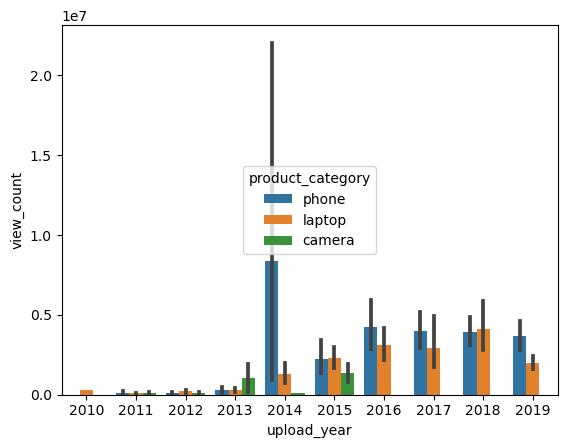

In [73]:
sns.barplot(x=unbox_therapy.upload_year, y=unbox_therapy.view_count, hue=unbox_therapy.product_category, estimator='mean')

<Axes: xlabel='upload_year', ylabel='count'>

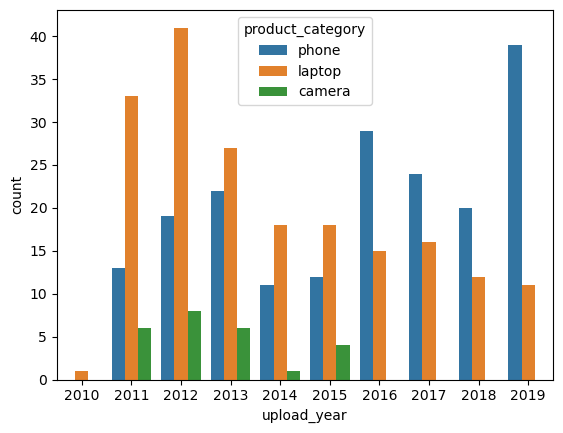

In [82]:
sns.countplot(x=unbox_therapy.upload_year, hue=unbox_therapy.product_category)